{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this page, you will be able to:

* View and sort data in **pandas** dataframes.
* Run calculations and summary statistics (e.g. mean, minimum, maximum) on columns in **pandas** dataframes. 

</div>

## Review of Methods and Attributes in Python

### Methods in Python

Previous chapters in this textbook have introduced the concept of functions as commands that can take inputs that are used to produce output. For example, you have used many functions, including the `print()` function to display the results of your code and to write messages about the results. 

You have also used functions provided by **Python** packages such as **numpy** to run calculations on **numpy** arrays. For example, you used `np.mean()` to calculate the average value of specified **numpy** array. To run these **numpy** functions, you explicitly provided the name of the variable as an input parameter.    

```python
np.mean(arrayname)
```

In **Python**, data structures such as **pandas** dataframes can also provide built-in functions that are referred to as methods. Each data structure has its own set of methods, based on how the data is organized and the types of operations supported by the data structure. A method can be called by adding the `.method_name()` after the name of the data structure (i.e. object):

```python
object_name.method()
```

rather than providing the name as an input parameter to a function:

```python
function(object_name)
```

In this chapter, you will explore some methods (i.e. functions specific to certain objects) that are accessible for **pandas** dataframes.


### Object Attributes in Python

In addition to functions and methods, you have also worked with attributes, which are automatically created characteristics (i.e. metadata) about the data structure or object that you are working with. For example, you used `.shape` to get the structure (i.e. rows, columns) of a specific **numpy** array using `array.shape`. This attribute `.shape` is automatically generated for a **numpy** array when it is created.

In this chapter, you will use attributes (i.e. metadata) to get more information about **pandas** dataframes that is automatically generated when it is created.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank">**Pandas** documentation</a> provides a list of all attributes and methods of **pandas** dataframes. 

### Import Python Packages and Get Data

Begin by importing the necessary **Python** packages and then downloading and importing data into **pandas** dataframes. As you learned previously in this textbook, you can use the **earthpy** package to download the data files, **os** to set the working directory, and **pandas** to import data files into **pandas** dataframes.

In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

In [2]:
# URL for .csv with avg monthly precip data
avg_monthly_precip_url = "https://ndownloader.figshare.com/files/12710618"

# Download file
et.data.get_data(url=avg_monthly_precip_url)

'/Users/leahwasser/earth-analytics/data/earthpy-downloads/avg-precip-months-seasons.csv'

In [3]:
# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [4]:
# Import data from .csv file
fname = os.path.join("earthpy-downloads",
                     "avg-precip-months-seasons.csv")

avg_monthly_precip = pd.read_csv(fname)

avg_monthly_precip

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring
5,June,2.02,Summer
6,July,1.93,Summer
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall


## View Contents of Pandas Dataframes

Rather than seeing all of the dataframe at once, you can choose to see the first few rows or the last few rows of a **pandas** dataframe using the methods `.head()` or `.tail()` (e.g. `dataframe.tail()`). 

This capability can be very useful for large datasets which cannot easily be displayed within **Jupyter Notebook**. 

In [5]:
# See first 5 rows
avg_monthly_precip.head()

,months,precip,seasons
0,Jan,0.70,Winter
1,Feb,0.75,Winter
2,Mar,1.85,Spring
3,Apr,2.93,Spring
4,May,3.05,Spring


In [6]:
# See last 5 rows
avg_monthly_precip.tail()

,months,precip,seasons
7,Aug,1.62,Summer
8,Sept,1.84,Fall
9,Oct,1.31,Fall
10,Nov,1.39,Fall
11,Dec,0.84,Winter


## Describe Contents of Pandas Dataframes

You can use the method `.info()` to get details about a **pandas** dataframe (e.g. `dataframe.info()`) such as the number of rows and columns and the column names. The output of the `.info()` method shows you the number of rows (or entries) and the number of columns, as well as the columns names and the types of data they contain (e.g. `float64` which is the default decimal type in **Python**).

In [7]:
# Information about the dataframe
avg_monthly_precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


You can also use the attribute `.columns` to see just the column names in a dataframe, or the attribute `.shape` to just see the number of rows and columns. 

In [8]:
# Get column names
avg_monthly_precip.columns

Index(['months', 'precip', 'seasons'], dtype='object')

In [9]:
# Number of rows and columns
avg_monthly_precip.shape

(12, 3)

## Run Summary Statistics on Numeric Values in Pandas Dataframes

**Pandas** dataframes also provide methods to summarize numeric values contained within the dataframe. For example, you can use the method `.describe()` to run summary statistics on all of the numeric columns in a **pandas** dataframe:

`dataframe.describe()`

such as the count, mean, minimum and maximum values. 

The output of `.describe()` is provided in a nicely formatted dataframe. Note that in the example dataset, the column called `precip` is the only column with numeric values, so the output of `.describe()` only includes that column. 

In [10]:
# Summary stats of all numeric columns
avg_monthly_precip.describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


Recall that in the lessons on **numpy** arrays, you ran multiple functions to get the mean, minimum and maximum values of **numpy** arrays. This fast calculation of summary statistics is one benefit of using **pandas** dataframes. Note that the `.describe()` method also provides the standard deviation (i.e. a measure of the amount of variation, or spread, across the data) as well as the quantiles of the **pandas** dataframes, which tell us how the data are distributed between the minimum and maximum values (e.g. the 25% quantile indicates the cut-off for the lowest 25% values in the data).

You can also run other summary statistics that are not included in `describe()` such as `.median()`, `.sum()`, etc, which provide the output in a <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html" target="_blank">**pandas** series</a> (i.e. a one-dimensional array for **pandas**).  

In [11]:
# Median of all numeric columns
avg_monthly_precip.median()

precip    1.73
dtype: float64

### Run Summary Statistics on Individual Columns

You can also run `.describe()` on individual columns in a **pandas** dataframe using:

`dataframe[["column_name"]].describe()`

Note that using the double set of brackets `[]` around `column_name` selects the column as a dataframe, and thus, the output is also provided as a dataframe. 

In [12]:
# Summary stats on precip column as dataframe
avg_monthly_precip[["precip"]].describe()

,precip
count,12.000000
mean,1.685833
std,0.764383
min,0.700000
25%,1.192500
50%,1.730000
75%,1.952500
max,3.050000


Using a single set of brackets (e.g. `dataframe["column_name"].describe()`) selects the column as a **pandas** series (a one-dimensional array of the column) and thus, the output is also provided as a **pandas** series. 

In [13]:
# Summary stats on precip column as series
avg_monthly_precip["precip"].describe()

count    12.000000
mean      1.685833
std       0.764383
min       0.700000
25%       1.192500
50%       1.730000
75%       1.952500
max       3.050000
Name: precip, dtype: float64

## Sort Data Values in Pandas Dataframes

Recall that in the lessons on **numpy** arrays, you can easily identify the minimum or maximum value, but not the month in which that value occurred. This is because the individual **numpy** arrays for `precip` and `months` were not connected in an easy way that would allow you to determine the month that matches the values. 

Using **pandas** dataframes, you can sort the values with the method `.sort_values()`, which takes as input: 
* the name of the column to sort
* a Boolean value of True or False for the parameter `ascending`

`dataframe.sort_values(by="column_name", ascending = True)`

Using this method, you can sort by the values in the `precip` column in descending order (`ascending = False`) to find the maximum value and its corresponding month. 

In [14]:
# Sort in descending order for precip
avg_monthly_precip.sort_values(by="precip",
                               ascending=False)

,months,precip,seasons
4,May,3.05,Spring
3,Apr,2.93,Spring
5,June,2.02,Summer
6,July,1.93,Summer
2,Mar,1.85,Spring
8,Sept,1.84,Fall
7,Aug,1.62,Summer
10,Nov,1.39,Fall
9,Oct,1.31,Fall
11,Dec,0.84,Winter


## Run Calculations on Columns Within Pandas Dataframes

You can run mathematical calculations on columns within **pandas** dataframes using any mathematical calculation and assignment operator such as:

`dataframe["column_name"] *= 25.4`

which would multiply each value in the column by 25.4.

Using an assignment operator, you can convert the values in the `precip` column from inches to millimeters (recall that one inch is equal to 25.4 millimeters). 

In [15]:
# Convert values from inches to millimeters
avg_monthly_precip["precip"] *= 25.4

avg_monthly_precip

,months,precip,seasons
0,Jan,17.780,Winter
1,Feb,19.050,Winter
2,Mar,46.990,Spring
3,Apr,74.422,Spring
4,May,77.470,Spring
5,June,51.308,Summer
6,July,49.022,Summer
7,Aug,41.148,Summer
8,Sept,46.736,Fall
9,Oct,33.274,Fall


You can also easily replace or create a new column within a **pandas** dataframe using mathematical calculations on itself or other columns such as:

`dataframe["column_name_2"] = dataframe["column_name_1"] / 25.4` 

If `column_name_2` already exists, then the values are replaced by the calculation (e.g. values in `column_name_2` are set to values of `column_name_1` divided by 25.4). If `column_name_2` does not already exist, then the column is created as the new last column of the dataframe. 

The approach below is preferred over directly modifying your existing data! 

In [16]:
# Create new column with precip in the original units (inches)
avg_monthly_precip["precip_in"] = avg_monthly_precip["precip"] / 25.4

avg_monthly_precip

,months,precip,seasons,precip_in
0,Jan,17.780,Winter,0.70
1,Feb,19.050,Winter,0.75
2,Mar,46.990,Spring,1.85
3,Apr,74.422,Spring,2.93
4,May,77.470,Spring,3.05
5,June,51.308,Summer,2.02
6,July,49.022,Summer,1.93
7,Aug,41.148,Summer,1.62
8,Sept,46.736,Fall,1.84
9,Oct,33.274,Fall,1.31


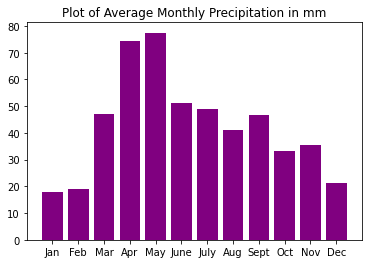

In [17]:
# Plot the data
f, ax = plt.subplots()

ax.bar(x=avg_monthly_precip.months,
       height=avg_monthly_precip.precip,
       color="purple")

ax.set(title="Plot of Average Monthly Precipitation in mm")
plt.show()

## Group Values in Pandas Dataframes

Another benefit of **pandas** dataframes is that you can group data using a shared common value and then summarize the values in another column using those groups. To do this, you can use the following syntax: 

`dataframe.groupby(['label_column'])[["value_column"]].method()`

in which the `label_column` is the column is used to create the groups and the `value_column` is the column that will be summarized for each group. 

For example, you could group the example dataframe by the `seasons` and then run the `describe()` method on `precip`. This would run `.describe()` on the precipitation values for each season as a grouped dataset. In this example, the `label_column` on which you want to group data is `seasons` and the `value_column` that you want to summarize is `precip`.  

In [18]:
# Group data by seasons and summarize precip
precip_by_season=avg_monthly_precip.groupby(["seasons"])[["precip"]].describe()
precip_by_season

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

To plot your grouped data, you will have to adjust the column headings. 
Above you have what's called a multiindex dataframe. It has two sets of indexes:

1. precip and 
2. the summary statistics: **count, meant, std, etc**

In [19]:
precip_by_season.columns

MultiIndex([('precip', 'count'),
            ('precip',  'mean'),
            ('precip',   'std'),
            ('precip',   'min'),
            ('precip',   '25%'),
            ('precip',   '50%'),
            ('precip',   '75%'),
            ('precip',   'max')],
           )

In [20]:
# Drop a level so there is only one index
precip_by_season.columns = precip_by_season.columns.droplevel(0)
precip_by_season

,count,mean,std,min,25%,50%,75%,max
seasons,,,,,,,,
Fall,3.0,38.438667,7.257173,33.274,34.290,35.306,41.021,46.736
Spring,3.0,66.294000,16.787075,46.990,60.706,74.422,75.946,77.470
Summer,3.0,47.159333,5.329967,41.148,45.085,49.022,50.165,51.308
Winter,3.0,19.388667,1.802028,17.780,18.415,19.050,20.193,21.336


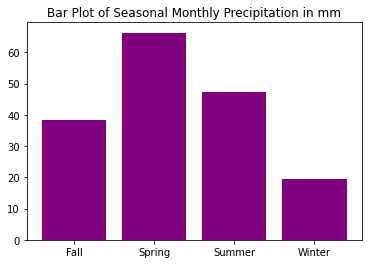

In [21]:
# Plot the data
f, ax = plt.subplots()

ax.bar(precip_by_season.index,
        precip_by_season["mean"],
        color="purple")

ax.set(title="Bar Plot of Seasonal Monthly Precipitation in mm")
plt.show()

In addition to running `.describe()` using a groupby, you can also run individual statistics such as:
* `.count()` to get the number of rows belonging to a specific group (e.g. season)
* other summary statistics such as `.median()`, `.sum()`, `.mean()`, etc, to calculate these summary statistics by a chosen group

In the example below, a new dataframe is created by running `.median()` on `precip` using a groupby on `seasons`. 

In [22]:
# Save median of precip for each season to dataframe
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].median()

avg_monthly_precip_median

,precip
seasons,
Fall,35.306
Spring,74.422
Summer,49.022
Winter,19.050


Note the structure of the new dataframe. Does it look different than other dataframes you have seen?

When you run the `.info()` on this new dataframe, you will see that the index is now the season names, which means that `seasons` is no longer a column.

In [23]:
avg_monthly_precip_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Fall to Winter
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   precip  4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


To avoid setting a new index when running summary statistics such as `median()`, you can add a Boolean value of False for the parameter `as_index` of `groupby()` to keep the original index.

In [24]:
# Save to new dataframe with original index
avg_monthly_precip_median = avg_monthly_precip.groupby(
    ["seasons"], as_index=False)[["precip"]].median()

avg_monthly_precip_median

,seasons,precip
0,Fall,35.306
1,Spring,74.422
2,Summer,49.022
3,Winter,19.050


## Reset Index of Pandas Dataframes

You can also easily reset the index of any dataframe back to a range index (i.e. starting at [0]) as needed using the syntax:

`dataframe.reset_index(inplace=True)`

The `inplace=True` tells the method `reset_index` to replace the named dataframe with the reset. Running this syntax on any dataframe will reset the index to a range index (i.e. starting at [0]). 

In the example below, the index is reset back to a range index starting at [0], rather than using the season name.

In [25]:
# Save summary stats of precip for each season to dataframe
avg_monthly_precip_stats = avg_monthly_precip.groupby(
    ["seasons"])[["precip"]].describe()

avg_monthly_precip_stats

precip                                                              
         count       mean        std     min     25%     50%     75%     max
seasons                                                                     
Fall       3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
Spring     3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
Summer     3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
Winter     3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

In [26]:
# Reset index
avg_monthly_precip_stats.reset_index(inplace=True)

avg_monthly_precip_stats

seasons precip                                                              
           count       mean        std     min     25%     50%     75%     max
0    Fall    3.0  38.438667   7.257173  33.274  34.290  35.306  41.021  46.736
1  Spring    3.0  66.294000  16.787075  46.990  60.706  74.422  75.946  77.470
2  Summer    3.0  47.159333   5.329967  41.148  45.085  49.022  50.165  51.308
3  Winter    3.0  19.388667   1.802028  17.780  18.415  19.050  20.193  21.336

Note in this example that the dataframe is back to a familiar format with a range index starting at `[0]`, but also retains the values calculated with `groupby()`.

You have now learned how to run calculations and summary statistics on columns in **pandas** dataframes. On the next page, you will learn various ways to select data from **pandas** dataframes, including indexing and filtering of values.